In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


# Note

This note is created with the purpose of familiarizing myself with simple and mutiple linear regression code implementation. While achieving the highest accuracy possible is often a primary goal in machine learning tasks, it's important to note that the main objective here is to gain practical experience in building and evaluating the models.

Any advice or suggestions for improvement are welcome and appreciated. The ultimate aim is to gain proficiency and enhance my understanding of machine learning algorithms. Thank you!!!

# 1. Exploratory Data Analysis(EDA) - Understanding the Dataset

In [2]:
# import Python libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# load the dataset
data = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
data.shape

(545, 13)

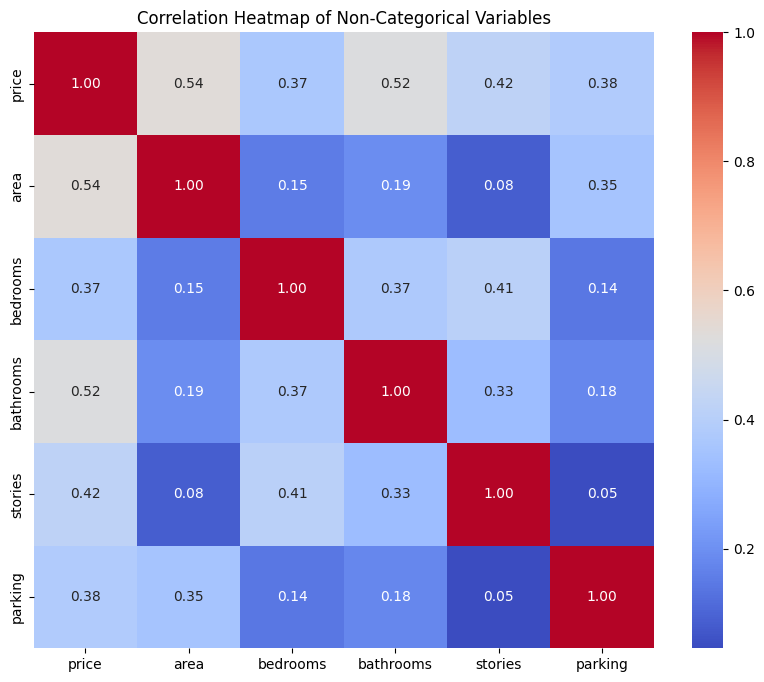

In [8]:
# Select only non-categorical columns
non_categorical_data = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

# Calculate correlation matrix
corr_matrix = non_categorical_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Non-Categorical Variables')
plt.show()

# 2. Simple Liner Regression

object: use area to make simple liner regression model and make prediction

In [9]:
# define X and y
X= data.loc[:,"area"]
y= data.loc[:,'price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [10]:
X = np.array(X).reshape(-1,1)
print(X.shape)

(545, 1)


In [11]:
#set up aliner regression model
LR1 = LinearRegression()

#train the model
LR1.fit(X,y)

LinearRegression()

In [12]:
# Calculate predicted values
y_predict_1 = LR1.predict(X)

# Print the first 5 predicted values
print(y_predict_1[:5]) 

[5815162.19790048 6526603.53508057 6988578.42935335 5852120.18944231
 5815162.19790048]


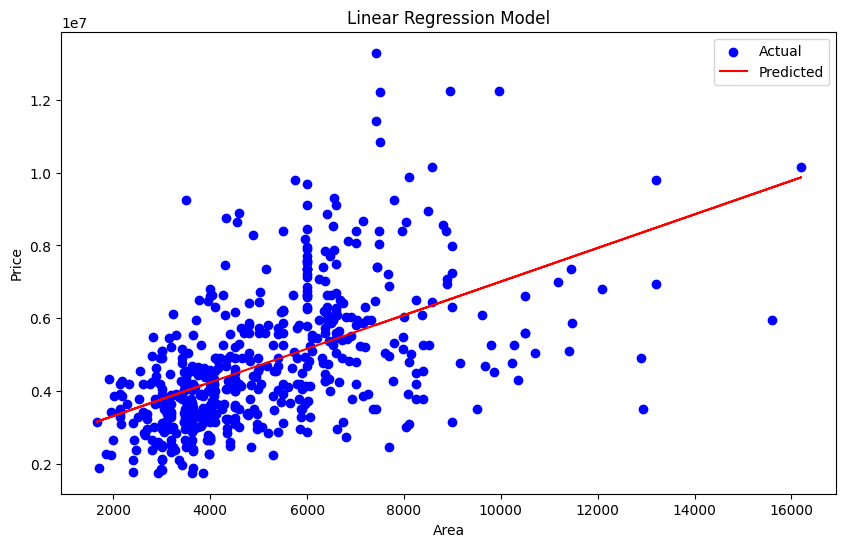

In [13]:
# Visualize the model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_predict_1, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [14]:
# Calculate mean squared error
mse = mean_squared_error(y, y_predict_1)

# Calculate R-squared score
r2 = r2_score(y, y_predict_1)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 2488861398180.6567
R-squared Score: 0.2872931546811469


**Conclusion:**

The linear regression model achieved a mean squared error of approximately 2.49 trillion and an R-squared score of approximately 0.29. The high MSE implies that there is a substantial deviation between the predicted and actual prices, indicating that the model's predictions are not consistently accurate. Additionally, the R-squared score of approximately 0.29 indicates that only 29% of the variability in the actual prices is accounted for by the model, The model's predictive performance is limited, indicating that other factors beyond the area may play significant roles in determining the property prices.

**Let's to use the model to predict the price:**

In [15]:
area1 = 5150.54 # avearage area

# Reshape the area value(s) to match the input shape expected by the model
area1 = np.array(area1).reshape(-1, 1)

# Use the trained model to predict the price for the given area value(s)
predicted_area1 = LR1.predict(area1)

print("Predicted Price:", predicted_area1)


Predicted Price: [4766728.65434417]


In [16]:
area2 = 16200 # maximun area

# Reshape the area value(s) to match the input shape expected by the model
area2 = np.array(area2).reshape(-1, 1)

# Use the trained model to predict the price for the given area value(s)
predicted_area2 = LR1.predict(area2)

print("Predicted Price:", predicted_area2)


Predicted Price: [9871301.76961552]


# 3. Mutiple Liner Regression

In [17]:
# define X_multi, will only include non-category data for this exercises
X_multi = non_categorical_data.drop(["price"],axis=1) #non_categorical_data already defined in section 1
print(X_multi.head())

   area  bedrooms  bathrooms  stories  parking
0  7420         4          2        3        2
1  8960         4          4        4        3
2  9960         3          2        2        2
3  7500         4          2        2        3
4  7420         4          1        2        2


In [18]:
#set up mutiple linear model
LR_multi = LinearRegression()

#train the model
LR_multi.fit(X_multi,y)

LinearRegression()

In [19]:
# Calculate predicted values
y_predict_multi = LR_multi.predict(X_multi)

# Print the first 5 predicted values
print(y_predict_multi[:5]) 

[ 7648873.96926545 11351808.25562893  7774157.72976678  7505019.68808916
  5967193.99706753]


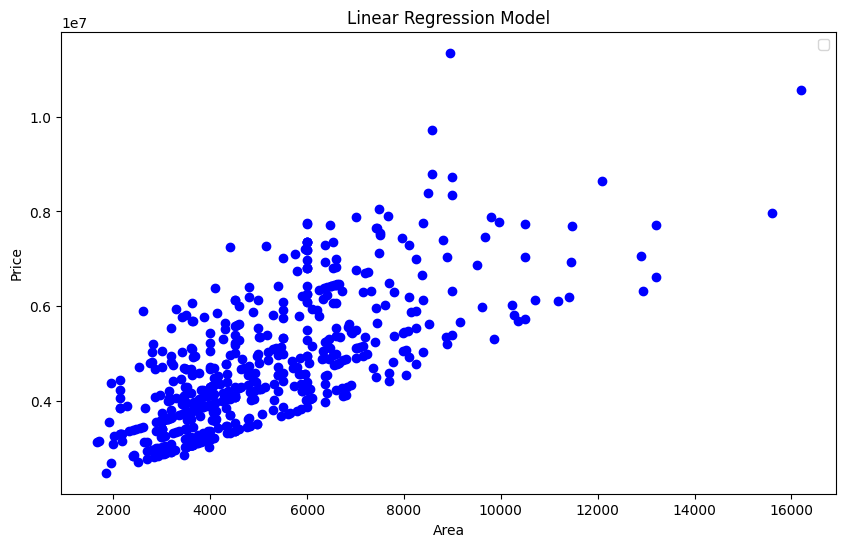

In [20]:
# Visualize the model
plt.figure(figsize=(10, 6))
plt.scatter(X, y_predict_multi, color='blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


In [21]:
# Calculate mean squared error
mse_multi = mean_squared_error(y, y_predict_multi)

# Calculate R-squared score
r2_multi = r2_score(y, y_predict_multi)

print("Mean Squared Error Multi:", mse_multi)
print("R-squared Score Multi:", r2_multi)

Mean Squared Error Multi: 1531008562668.3982
R-squared Score Multi: 0.5615825438679802


**Conclusion:** 

Previous Results (Use only one varriant):

Mean Squared Error: 2.49 trillion, 
R-squared Score: 0.29

New Results (Use multi non-category varriant):

Mean Squared Error: 1.53 trillion, 
R-squared Score: 0.56

Comparison:
The linear regression model with the new results exhibits improved performance compared to the previous model. The mean squared error has decreased significantly from approximately 2.49 trillion to 1.53 trillion, indicating that the deviation between predicted and actual prices is reduced. Additionally, the R-squared score has increased substantially from approximately 0.29 to 0.56, suggesting that the new model explains around 56% of the variance in actual prices, compared to only 29% explained by the previous model. Overall, the updated model demonstrates better predictive capability and explanatory power in estimating property prices based on area.

**Let's to use the model to predict the price:**

If there is a house like: area 20000 units,3 bedrooms,3 bathrooms,4 stories and 2 parking

In [22]:
# Define the test data
test1 = np.array([20000, 3, 3, 4, 3]).reshape(1, -1)

# Use the trained multiple linear regression model to predict the price for the test data
predicted_test1 = LR_multi.predict(test1)

print("Predicted Price:", predicted_test1)


Predicted Price: [13705773.37304313]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


If there is a house like: area 7000 units,1 bedrooms,1 bathrooms,3 stories and 1 parking

In [23]:
# Define the test data
test2 = np.array([7000, 1, 1, 3, 1]).reshape(1, -1)

# Use the trained multiple linear regression model to predict the price for the test data
predicted_test2 = LR_multi.predict(test2)

print("Predicted Price:", predicted_test2)


Predicted Price: [5495039.64566712]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Calculate for average: approximately area 5150.54, units,3 bedrooms,1 bathrooms,2 stories and 1 parking

In [24]:
# Define the test data
test_ave = np.array([5150.54, 3, 1, 2, 1]).reshape(1, -1)

# Use the trained multiple linear regression model to predict the price for the test data
predicted_test_ave = LR_multi.predict(test_ave)

print("Predicted Price:", predicted_test_ave)


Predicted Price: [4670334.54832445]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 4. Discussion

In this exercise, I utilized two different approaches to build predictive models for property prices based on a given dataset. In the first model, I employed simple linear regression with a single variable, specifically the "area" of the properties. This basic model provided a starting point to understand the relationship between the area and prices of properties. Then, I constructed a second model using multiple linear regression, incorporating additional non-categorical data features from the dataset. This model proved to be significantly more effective in predicting property prices compared to the first model. 

Moving forward, there are several strategies I plan to explore to further improve the predictive accuracy of my models. Firstly, I intend to incorporate categorical variables by applying techniques such as one-hot encoding to represent them numerically. Additionally, I will explore feature engineering to create new features that capture important relationships between existing variables.

Moreover, I recognize the value of cross-validation techniques to evaluate the robustness of my models and ensure their generalization to unseen data. By applying these methodologies and drawing from the knowledge acquired in my class, I aim to refine my models and enhance their predictive performance.

In conclusion, while my initial models provide valuable insights into property price prediction, there remains ample room for refinement and improvement. I look forward to further exploration and experimentation to develop more accurate and reliable predictive models.

Thank you for reading, and feel free to comment.